<a href="https://colab.research.google.com/github/ZubairHasan97/Comp_Bio/blob/main/ssa_Gene_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stochastic Modelling of Gene Network**

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import random

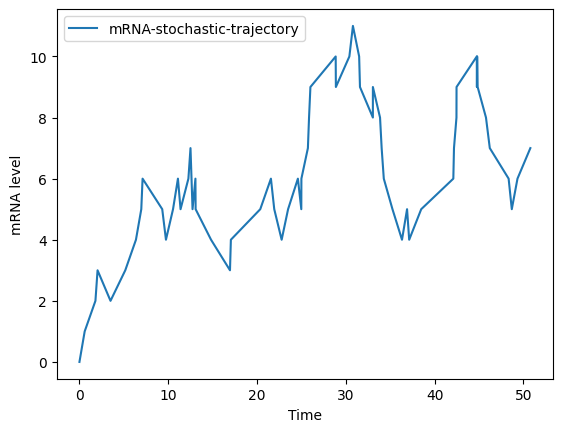

In [178]:
#Modelling mRNA transcription

# initial timepoint and state of mRNA
mRNA = [0]
t = [0]

k = 0.9
gam = 0.1

# at steady state mRNA level should reach k/gam => 0.9/0.1 = 9 so stochastic trajectory will around 9 at steady state

sim_end_time = 50

while t[-1] < sim_end_time:

  current_mRNA = mRNA[-1]

  rates = [k, gam*current_mRNA]
  rate_sum = sum(rates)

  tau = np.random.exponential(scale = 1/rate_sum) # choosing random tau sample from exponential distrubution

  t.append(t[-1] + tau) # selecting random timepoints using exponential distrubution of tau

  rand_prob = random.uniform(0,1)

  if rand_prob * rate_sum > 0 and rand_prob * rate_sum <= rates[0]:
    mRNA.append(mRNA[-1] + 1)
  elif rand_prob * rate_sum > rates[0] and rand_prob * rate_sum <= sum(rates):
    mRNA.append(mRNA[-1] - 1)
  # ///////////////////////////////////////////////////////////
  # same conditional statement with different writing syntax
  # if 0 < rand_prob * rate_sum <= rates[0]:
  #   mRNA.append(mRNA[-1] + 1)
  # elif rates[0] < rand_prob * rate_sum <= sum(rates):
  #   mRNA.append(mRNA[-1] - 1)

# print(mRNA, t)

plt.plot(t, mRNA, label="mRNA-stochastic-trajectory")
plt.xlabel('Time')
plt.ylabel('mRNA level')
plt.legend()
plt.show()

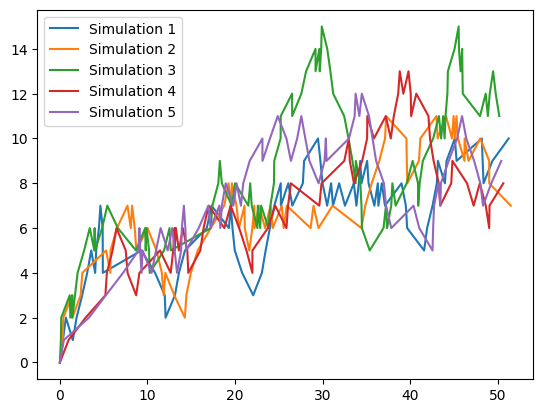

In [179]:
# Running the stochastic simulation X number of times and interpolating the average of the all the simulation

num_simulations = 5
sim_end_time = 50
k = 0.9
gam = 0.1

# Store all trajectories in a list
all_trajectories = []

for num_sim in range(num_simulations):
    mRNA = [0]
    t = [0]

    while t[-1] < sim_end_time:
        current_mRNA = mRNA[-1]
        rates = [k, gam * current_mRNA]
        rate_sum = sum(rates)

        tau = np.random.exponential(scale=1 / rate_sum)
        t.append(t[-1] + tau)

        rand_prob = random.uniform(0, 1)

        if 0 < rand_prob * rate_sum <= rates[0]:
            mRNA.append(mRNA[-1] + 1)
        elif rates[0] < rand_prob * rate_sum <= sum(rates):
            mRNA.append(mRNA[-1] - 1)

    all_trajectories.append((t, mRNA))  # Store time and mRNA as a tuple

# print(len(all_trajectories))

for time_points, mRNA_values in all_trajectories:
    plt.plot(time_points, mRNA_values, label=f"Simulation {all_trajectories.index((time_points, mRNA_values))+1}")
    # print(time_points, mRNA_values)


plt.legend()
plt.show()

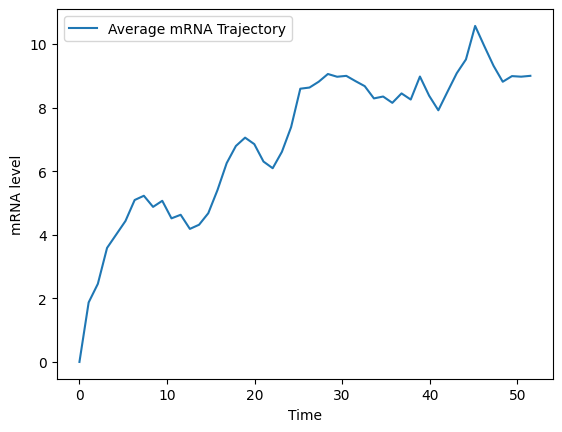

In [180]:
# Calculate average trajectory
# Create a list of all time points
all_time_points = [t for t, m in all_trajectories]
# print(len(all_time_points))
# all_mRNA_lvl = [m for t, m in all_trajectories]
# print(len(all_mRNA_lvl))

# Find the maximum time point across all simulations
maxtime_per_sim = [max(time_points) for time_points in all_time_points]
# print(maxtime_per_sim)
maxtime_overall = max(maxtime_per_sim)
# print(maxtime_overall)

# Create a common time grid for averaging
common_time_grid = np.linspace(0, maxtime_overall, num=50)  # Adjust the number of points as needed

# Interpolate mRNA values onto the common time grid
interpolated_trajectories_mRNA = []
for time_points, mRNA_values in all_trajectories:
    interpolated_mRNA = np.interp(common_time_grid, time_points, mRNA_values)
    interpolated_trajectories_mRNA.append(interpolated_mRNA)

# print(interpolated_trajectories_mRNA)

# Calculate the average trajectory
average_trajectory = np.mean(interpolated_trajectories_mRNA, axis=0)
# print(average_trajectory)

# Plot the average trajectory
plt.plot(common_time_grid, average_trajectory, label="Average mRNA Trajectory")
plt.xlabel('Time')
plt.ylabel('mRNA level')
plt.legend()
plt.show()



```
# Draw 10 random samples with an average time between events of 4
samples = np.random.exponential(scale=4, size=10)
print(samples)

```



**Stochastic Modelling of 3-gene Oscillatory Network w/Gillespie's SSA**

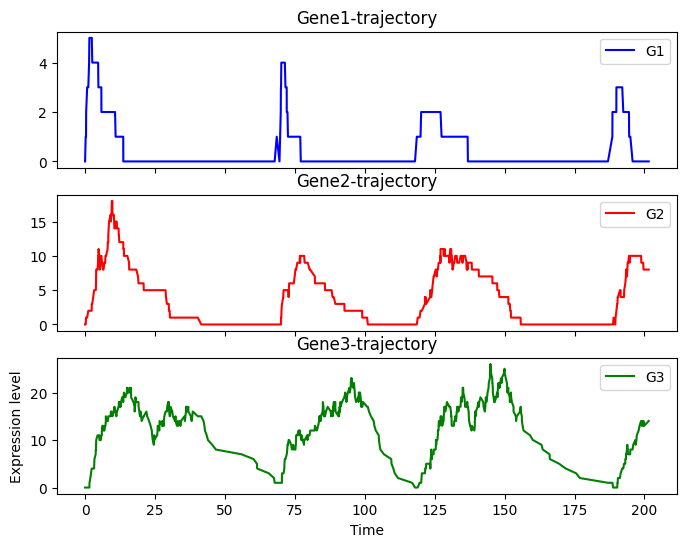

In [181]:
#Single simulation

G1 = [0]
G2 = [0]
G3 = [0]
t = [0]

sim_time = 200

#parameters
k_1 = 2
gamma_1 = 0.1
k_2 = 2
gamma_2 = 0.1
k_3 = 2
gamma_3 = 0.1
n = 9
c = 1

while t[-1] < sim_time:
  current_G1 = G1[-1]
  current_G2 = G2[-1]
  current_G3 = G3[-1]

  rates = [(c**n / (c**n + current_G3**n)) * k_1, gamma_1 * current_G1, \
        (current_G1**n / (c**n + current_G1**n)) * k_2, gamma_2 * current_G2, \
        (current_G2**n / (c**n + current_G2**n)) * k_3, gamma_3 * current_G3]

  rate_sum = sum(rates)

  tau = np.random.exponential(scale=1/rate_sum)

  t.append(t[-1] + tau)

  rand_prob = random.uniform(0,1)

  #G1 production event
  if 0 < rand_prob * rate_sum <= rates[0]:
    G1.append(G1[-1] + 1)
    G2.append(G2[-1])
    G3.append(G3[-1])
  #G1 degradation event
  elif rates[0] < rand_prob * rate_sum <= sum(rates[:2]):
    G1.append(G1[-1] - 1)
    G2.append(G2[-1])
    G3.append(G3[-1])
  #G2 production event
  elif sum(rates[:2]) < rand_prob * rate_sum <= sum(rates[:3]):
    G1.append(G1[-1])
    G2.append(G2[-1] + 1)
    G3.append(G3[-1])
  #G2 degradation event
  elif sum(rates[:3]) < rand_prob * rate_sum <= sum(rates[:4]):
    G1.append(G1[-1])
    G2.append(G2[-1] - 1)
    G3.append(G3[-1])
  #G3 production event
  elif sum(rates[:4]) < rand_prob * rate_sum <= sum(rates[:5]):
    G1.append(G1[-1])
    G2.append(G2[-1])
    G3.append(G3[-1] + 1)
  #G3 degradation event
  elif sum(rates[:5]) < rand_prob * rate_sum <= sum(rates):
    G1.append(G1[-1])
    G2.append(G2[-1])
    G3.append(G3[-1] - 1)

# plotting
canvas, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=False, figsize=(8, 6))
line1 = ax1.plot(t, G1, label="G1", color="b")
line2 = ax2.plot(t, G2, label="G2", color="r")
line3 = ax3.plot(t, G3, label="G3", color="g")
ax1.set_title("Gene1-trajectory")
ax2.set_title("Gene2-trajectory")
ax3.set_title("Gene3-trajectory")
ax1.legend(handles=line1)
ax2.legend(handles=line2)
ax3.legend(handles=line3)
plt.xlabel('Time')
plt.ylabel('Expression level')
plt.show()

Enter the # of Sim: (i.e. 5): 
2
Enter Sim Time: (i.e. 500s): 
23


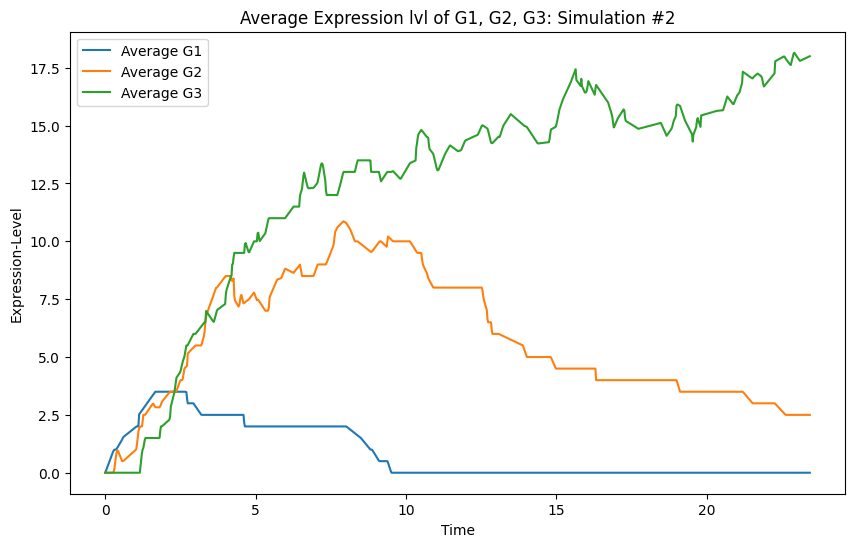

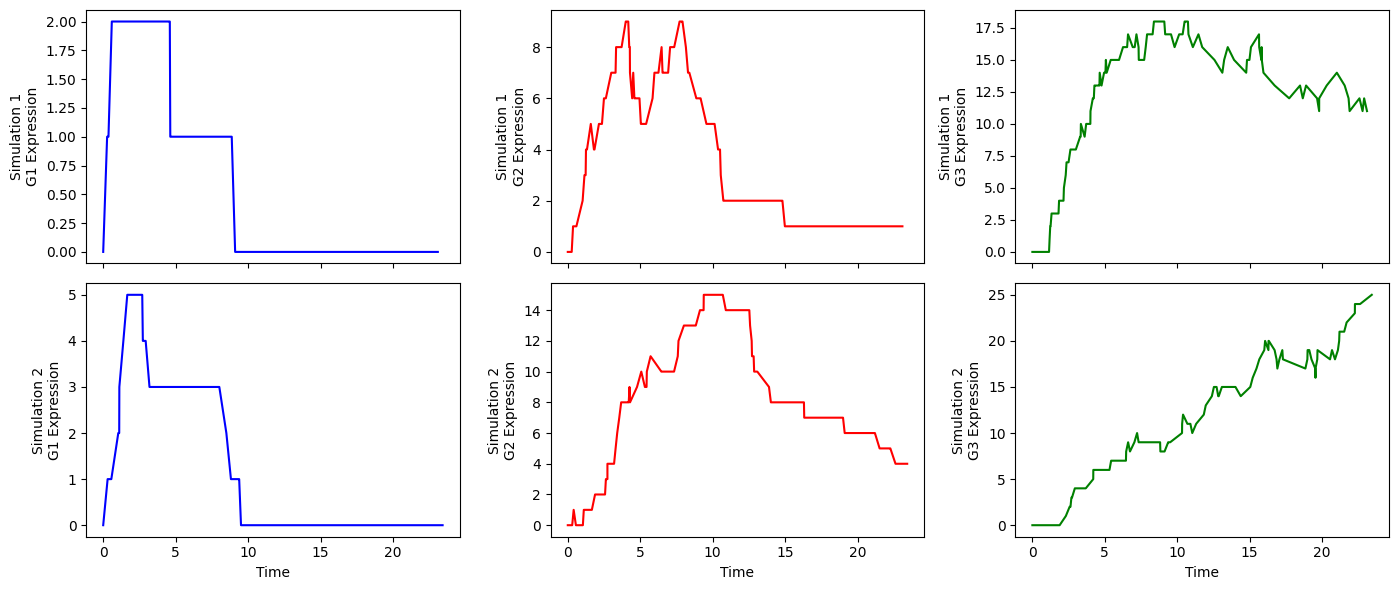

In [182]:
# multiple simulations
num_simulations = int(input("Enter the # of Sim: (i.e. 5): \n"))

sim_time = int(input("Enter Sim Time: (i.e. 500s): \n")) # duration of sim

# parameters
k_1 = 2
gamma_1 = 0.1
k_2 = 2
gamma_2 = 0.1
k_3 = 2
gamma_3 = 0.1
n = 9
c = 1

all_sim_data = []  # Store results of each simulation

for num_sim in range(num_simulations):
    G1 = [0]
    G2 = [0]
    G3 = [0]
    t = [0]

    while t[-1] < sim_time:
        current_G1 = G1[-1]
        current_G2 = G2[-1]
        current_G3 = G3[-1]

        rates = [(c**n / (c**n + current_G3**n)) * k_1, gamma_1 * current_G1, \
        (current_G1**n / (c**n + current_G1**n)) * k_2, gamma_2 * current_G2, \
        (current_G2**n / (c**n + current_G2**n)) * k_3, gamma_3 * current_G3]

        rate_sum = sum(rates)

        tau = np.random.exponential(scale=1/rate_sum)

        t.append(t[-1] + tau)

        rand_prob = random.uniform(0,1)

        #G1 production event
        if 0 < rand_prob * rate_sum <= rates[0]:
          G1.append(G1[-1] + 1)
          G2.append(G2[-1])
          G3.append(G3[-1])
        #G1 degradation event
        elif rates[0] < rand_prob * rate_sum <= sum(rates[:2]):
          G1.append(G1[-1] - 1)
          G2.append(G2[-1])
          G3.append(G3[-1])
        #G2 production event
        elif sum(rates[:2]) < rand_prob * rate_sum <= sum(rates[:3]):
          G1.append(G1[-1])
          G2.append(G2[-1] + 1)
          G3.append(G3[-1])
        #G2 degradation event
        elif sum(rates[:3]) < rand_prob * rate_sum <= sum(rates[:4]):
          G1.append(G1[-1])
          G2.append(G2[-1] - 1)
          G3.append(G3[-1])
        #G3 production event
        elif sum(rates[:4]) < rand_prob * rate_sum <= sum(rates[:5]):
          G1.append(G1[-1])
          G2.append(G2[-1])
          G3.append(G3[-1] + 1)
        #G3 degradation event
        elif sum(rates[:5]) < rand_prob * rate_sum <= sum(rates):
          G1.append(G1[-1])
          G2.append(G2[-1])
          G3.append(G3[-1] - 1)

    all_sim_data.append((t, G1, G2, G3))  # Store results

# print(all_sim_data[0][0])
# print(all_sim_data[0][1])
# print(all_sim_data[0][2]) # debugging
# print(all_sim_data[0][3])

def plot_avrg_trajectory(allSimData, nSim):
  # Determine the maximum time
  max_time = max(max(data[0]) for data in allSimData)

  # Create a common time grid
  common_time_grid = np.linspace(0, max_time, num=1000)

  # Interpolate and average for each gene
  avg_G1 = np.mean([np.interp(common_time_grid, data[0], data[1]) for data in allSimData], axis=0)
  avg_G2 = np.mean([np.interp(common_time_grid, data[0], data[2]) for data in allSimData], axis=0)
  avg_G3 = np.mean([np.interp(common_time_grid, data[0], data[3]) for data in allSimData], axis=0)

  # Plot the average trajectories of 3 genes
  plt.figure(figsize=(10, 6))
  plt.plot(common_time_grid, avg_G1, label="Average G1")
  plt.plot(common_time_grid, avg_G2, label="Average G2")
  plt.plot(common_time_grid, avg_G3, label="Average G3")
  plt.title(f"Average Expression lvl of G1, G2, G3: Simulation #{nSim}")
  plt.xlabel("Time")
  plt.ylabel("Expression-Level")
  plt.legend()

def plot_indiv_trajectory(allSimData, nSim):

  fig1, axes = plt.subplots(nSim, 3, sharex=True, figsize=(14, 3 * nSim))

  for i, (time_points, G1_values, G2_values, G3_values) in enumerate(allSimData):
      axes[i,0].plot(time_points, G1_values, label="G1", color="b")
      axes[i,1].plot(time_points, G2_values, label="G2", color="r")
      axes[i,2].plot(time_points, G3_values, label="G3", color="g")

      axes[i,0].set_ylabel(f"Simulation {i + 1}\nG1 Expression")
      axes[i,1].set_ylabel(f"Simulation {i + 1}\nG2 Expression")
      axes[i,2].set_ylabel(f"Simulation {i + 1}\nG3 Expression")

      axes[-1, 0].set_xlabel("Time")
      axes[-1, 1].set_xlabel("Time")
      axes[-1, 2].set_xlabel("Time")

      # print(i, G1_values, G2_values, G3_values) # debugging

def plot_trajectory(time, Gn1, Gn2, Gn3): #to plot single simulation data points
  print("!!! NUMBER OF SIM IS ONLY ONE !!!")
  fig2, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, sharey=False, figsize=(8, 6))
  line1 = ax1.plot(time, Gn1, label="G1", color="b")
  line2 = ax2.plot(time, Gn2, label="G2", color="r")
  line3 = ax3.plot(time, Gn3, label="G3", color="g")
  ax1.set_title("Gene1-trajectory")
  ax2.set_title("Gene2-trajectory")
  ax3.set_title("Gene3-trajectory")
  ax1.legend(handles=line1)
  ax2.legend(handles=line2)
  ax3.legend(handles=line3)
  plt.xlabel('Time')
  plt.ylabel('Expression level')

# Plotting the simulated results
if num_simulations > 1:

  plot_avrg_trajectory(all_sim_data, num_simulations)

  plot_indiv_trajectory(all_sim_data, num_simulations)

else:

  plot_trajectory(all_sim_data[0][0], all_sim_data[0][1], all_sim_data[0][2], all_sim_data[0][3])

plt.tight_layout()
plt.show()